# GRIP : The Sparks Foundation
# Data Science and Business Analytics Internship
# Name : Rujul A. Khupsangikar

# TASK 1: Prediction Using Supervised Machine Learning



In this regression tasks, we will predict the percentage of marks that a student is expected to score based upon the numbers of hpurs they studied.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading and Preparing Data

In [32]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [33]:
print(data.shape)

(25, 2)


In [34]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [35]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


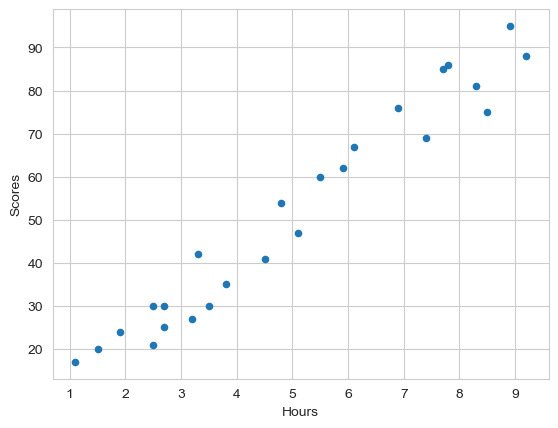

In [37]:
data.plot(kind='scatter',x='Hours',y='Scores')
plt.show()

In [38]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [39]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

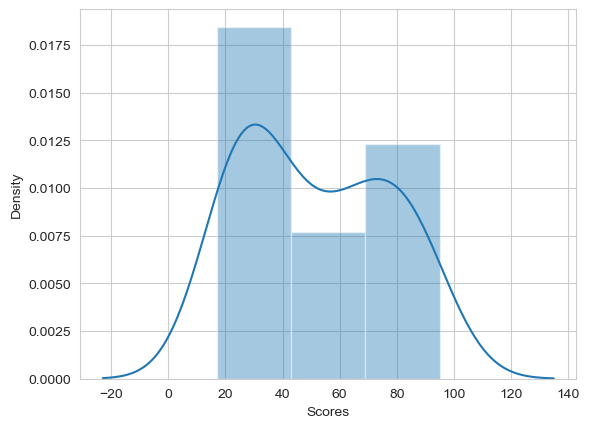

In [52]:
sns.distplot(data.Scores)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

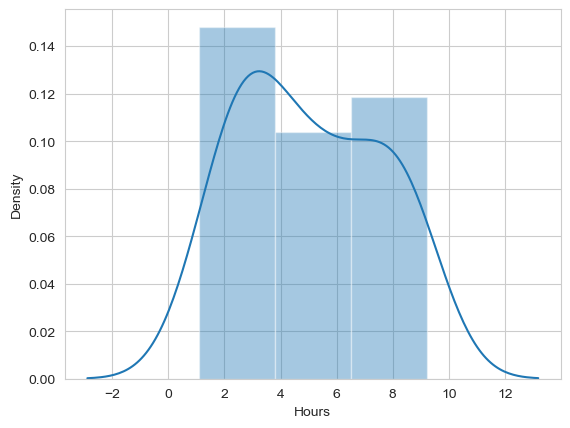

In [41]:
sns.distplot(data.Hours)

# Linear Regression

In [42]:
x=data.iloc[:,:1].values
y=data.iloc[:,1].values

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [44]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

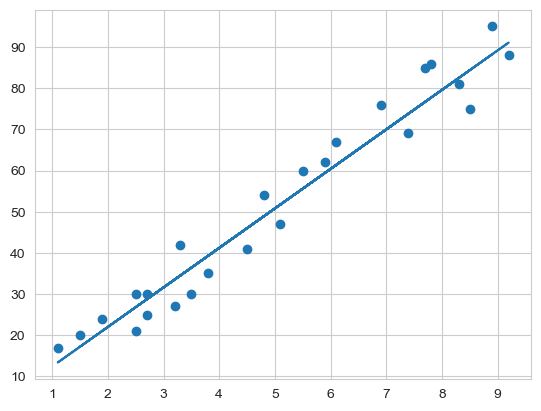

In [45]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [46]:
y_pred=reg.predict(x_test)

In [47]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


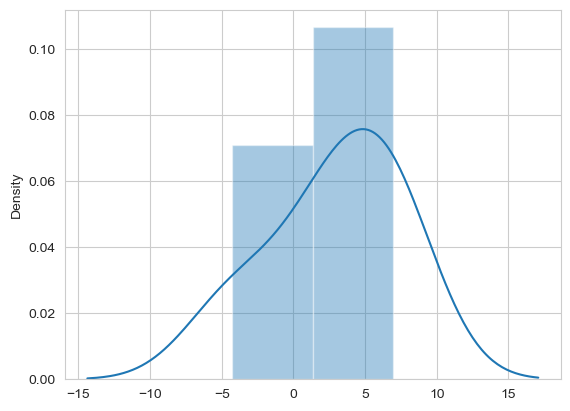

In [48]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

In [49]:
h=9.25
s=reg.predict([[h]])
print("If a student studies for {} hours per day he/she will score {}% in exams".format(h,s))

If a student studies for 9.25 hours per day he/she will score [91.56986604]% in exams


# Model Evaluation

In [50]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))

Mean Absolute Error:  4.5916495300630285
R2 score: 0.971014141329942
